In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Grapevine_Leaves_Image_Dataset_Citation_Request.txt
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (20).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (16).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (79).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (55).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (53).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (23).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (42).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (72).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Im

In [24]:
from PIL import Image

In [25]:
image1 = Image.open("/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Ak/Ak (1).png")
image2 = Image.open("/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Ala_Idris/Ala_Idris (1).png")
image3 = Image.open("/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (1).png")
image4 = Image.open("/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Dimnit/Dimnit (1).png")
image5 = Image.open("/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Nazli/Nazli (1).png")

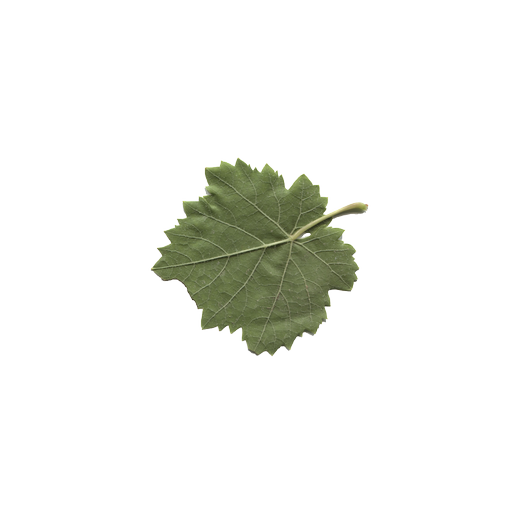

In [26]:
image1

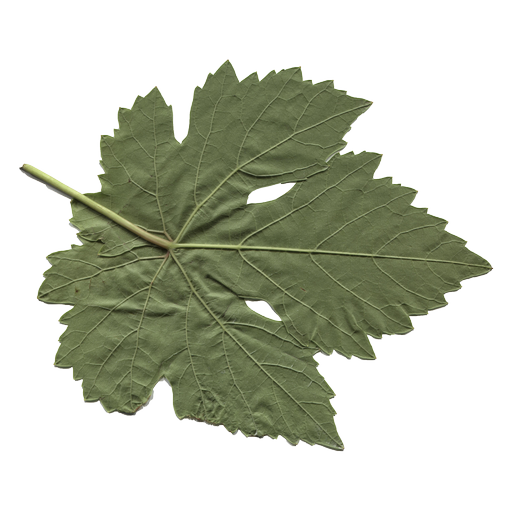

In [27]:
image2

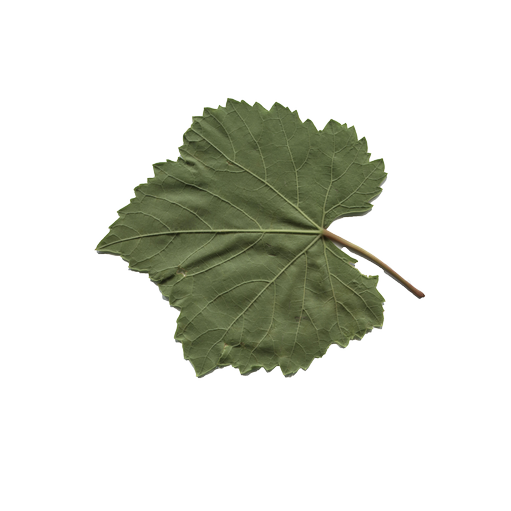

In [28]:
image3

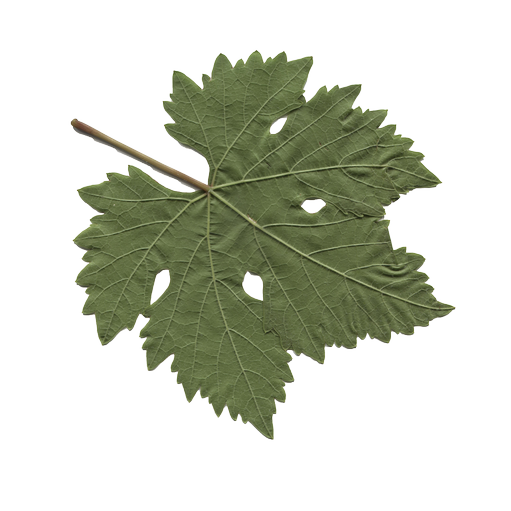

In [29]:
image4

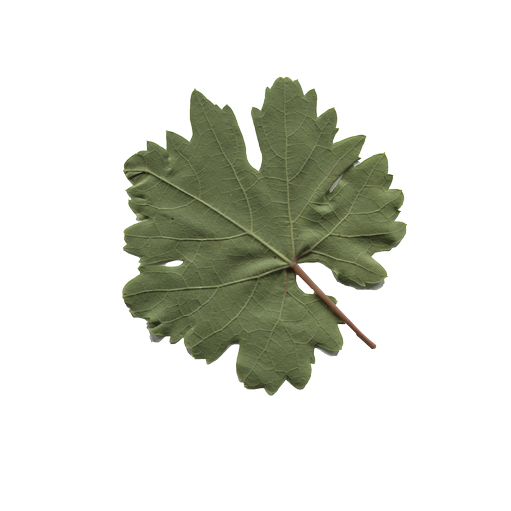

In [30]:
image5

In [31]:
image1.size, image2.size, image3.size, image4.size, image5.size    # Each image has same size

((511, 511), (511, 511), (511, 511), (511, 511), (511, 511))

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
data = ImageDataGenerator(rescale = 1/255.0,validation_split=0.2, horizontal_flip=True, vertical_flip=True)

In [34]:
trainData = data.flow_from_directory(directory = "/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset", 
                                     target_size=(256, 256),class_mode='categorical', batch_size=32,shuffle=True, subset = "training")

Found 400 images belonging to 5 classes.


In [35]:
testData = data.flow_from_directory(directory = "/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset", 
                                     target_size=(256, 256),class_mode='categorical', batch_size=32,shuffle=True, subset = "validation")

Found 100 images belonging to 5 classes.


In [36]:
import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D, Dropout

In [37]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation ="relu", input_shape=(256,256,3)))
model.add(Conv2D(32, kernel_size = (3,3), activation ="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size = (3,3), activation ="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size = (3,3), activation ="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, activation ="relu"))
model.add(Dense(64, activation ="relu"))
model.add(Dense(32, activation ="relu"))
model.add(Dense(5, activation ="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 60, 60, 128)      

In [38]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])        # Adam Optimizer help us to find the largest and the smallest value by using gradient descend 

In [39]:
history = model.fit(trainData, steps_per_epoch= len(trainData), epochs = 50, verbose= 1, validation_data = testData, validation_steps = len(testData))

Epoch 1/50
13/13 [==============================] - 6s 395ms/step - loss: 1.6853 - accuracy: 0.2075 - val_loss: 1.6096 - val_accuracy: 0.2000
Epoch 2/50
13/13 [==============================] - 5s 401ms/step - loss: 1.6118 - accuracy: 0.2000 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 3/50
13/13 [==============================] - 3s 243ms/step - loss: 1.6103 - accuracy: 0.2000 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 4/50
13/13 [==============================] - 3s 245ms/step - loss: 1.6097 - accuracy: 0.2000 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 5/50
13/13 [==============================] - 3s 236ms/step - loss: 1.6108 - accuracy: 0.1975 - val_loss: 1.6092 - val_accuracy: 0.2000
Epoch 6/50
13/13 [==============================] - 3s 242ms/step - loss: 1.6072 - accuracy: 0.2275 - val_loss: 1.6085 - val_accuracy: 0.2200
Epoch 7/50
13/13 [==============================] - 3s 259ms/step - loss: 1.5996 - accuracy: 0.2475 - val_loss: 1.6089 - val_accuracy: 0.2500
Epoch 

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, layers

In [41]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False,  input_shape=(256, 256, 3))

In [42]:
# The last 15 layers fine tune
for layer in InceptionV3_model.layers[:-1]:
    layer.trainable = False

x = InceptionV3_model.output
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(units=512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(units=512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
output  = layers.Dense(units=5, activation='softmax')(x)
model = Model(InceptionV3_model.input, output)


model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_102 (Conv2D)             (None, 127, 127, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 127, 127, 32) 96          conv2d_102[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 127, 127, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [45]:
!pip install visualkeras
import visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.8/989.8 kB 46.4 MB/s eta 0:00:00


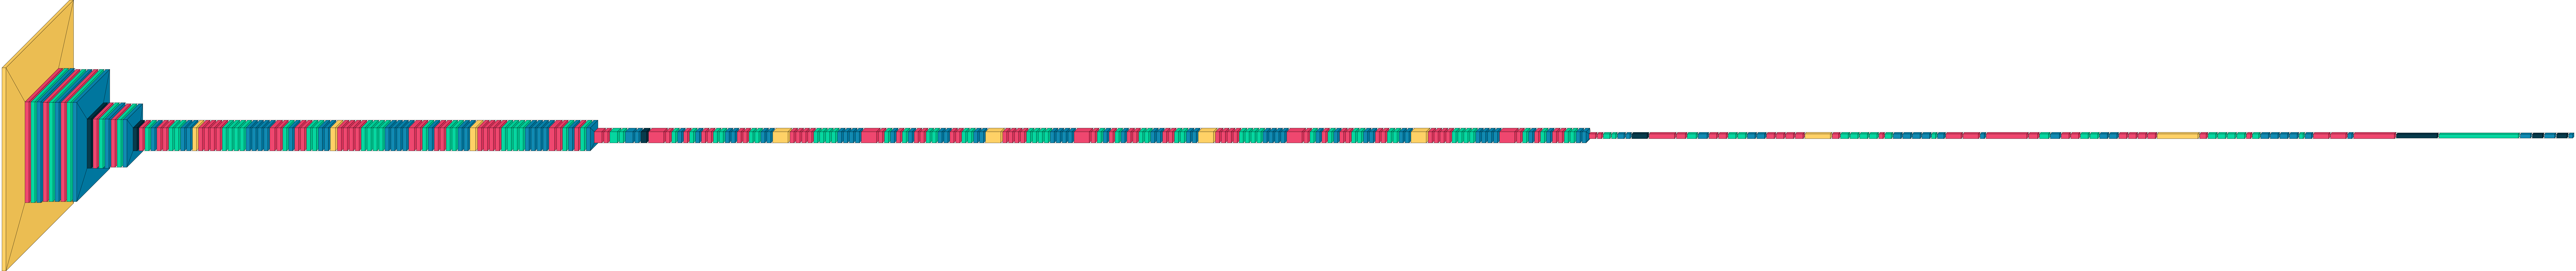

In [46]:
visualkeras.layered_view(model)

In [43]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [44]:
history = model.fit(trainData, steps_per_epoch= len(trainData), epochs = 50, verbose= 1, validation_data = testData, validation_steps = len(testData))

Epoch 1/50
13/13 [==============================] - 9s 359ms/step - loss: 9.3935 - accuracy: 0.2800 - val_loss: 2.5328 - val_accuracy: 0.4300
Epoch 2/50
13/13 [==============================] - 3s 243ms/step - loss: 2.8932 - accuracy: 0.4100 - val_loss: 1.2005 - val_accuracy: 0.5400
Epoch 3/50
13/13 [==============================] - 3s 270ms/step - loss: 1.4175 - accuracy: 0.4625 - val_loss: 1.1184 - val_accuracy: 0.5900
Epoch 4/50
13/13 [==============================] - 3s 251ms/step - loss: 1.1629 - accuracy: 0.5000 - val_loss: 1.0889 - val_accuracy: 0.5600
Epoch 5/50
13/13 [==============================] - 3s 253ms/step - loss: 1.0093 - accuracy: 0.5950 - val_loss: 1.1559 - val_accuracy: 0.5600
Epoch 6/50
13/13 [==============================] - 4s 286ms/step - loss: 0.9690 - accuracy: 0.6000 - val_loss: 1.1126 - val_accuracy: 0.5700
Epoch 7/50
13/13 [==============================] - 3s 246ms/step - loss: 0.9188 - accuracy: 0.6475 - val_loss: 1.0163 - val_accuracy: 0.5400
Epoch 